In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
#sys.path.append("../../meshAfterParty/meshAfterParty")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time
import system_utils as su

# How to generate the decomposition from scratch

In [3]:
# import trimesh_utils as tu
# mesh_file_path = Path("/notebooks/test_neurons/multi_soma_example.off")
# mesh_file_path.exists()
# current_neuron_mesh = tu.load_mesh_no_processing(str(mesh_file_path.absolute()))

# # picking a random segment id
# segment_id = 12345
# description = "double_soma_meshafterparty"

# # --------------------- Processing the Neuron ----------------- #
# import soma_extraction_utils as sm

# somas = sm.extract_soma_center(segment_id,
#                              current_neuron_mesh.vertices,
#                              current_neuron_mesh.faces)

# import time
# meshparty_time = time.time()
# import compartment_utils as cu
# cu = reload(cu)

# import meshparty_skeletonize as m_sk
# import preprocess_neuron as pn
# pn = reload(pn)
# m_sk = reload(m_sk)

# somas = somas

# nru = reload(nru)
# neuron = reload(neuron)
# current_neuron = neuron.Neuron(
#     mesh=current_neuron_mesh,
#     segment_id=segment_id,
#     description=description,
#     decomposition_type="meshafterparty",
#     somas = somas,
#     #branch_skeleton_data=branch_skeleton_data,
#     suppress_preprocessing_print=False,
# )
# print(f"Total time for processing: {time.time() - meshparty_time}")


# # ----------------- Calculating the Spines and Width ----------- #
# current_neuron.calculate_spines(print_flag=True)
# #nviz.plot_spines(current_neuron)

# current_neuron.calculate_new_width(no_spines=False,
#                                        distance_by_mesh_center=True)

# current_neuron.calculate_new_width(no_spines=False,
#                                        distance_by_mesh_center=True,
#                                        summary_measure="median")

# current_neuron.calculate_new_width(no_spines=True,
#                                        distance_by_mesh_center=True,
#                                        summary_measure="mean")

# current_neuron.calculate_new_width(no_spines=True,
#                                        distance_by_mesh_center=True,
#                                        summary_measure="median")

# # ------------------ Saving off the Neuron --------------- #
# current_neuron.save_compressed_neuron(output_folder=Path("/notebooks/test_neurons/meshafterparty_processed/"),
#                                      export_mesh=True)

# Loading in the Neuron Object

In [5]:
current_file = "/notebooks/test_neurons/meshafterparty_processed/12345_double_soma_meshafterparty_fixed_connectors"
neuron_obj = nru.decompress_neuron(filepath=current_file,
                                  original_mesh=current_file,
                                  minimal_output=True)


Inside decompress neuron and decomposition_type = meshafterparty
Passed faces original mesh check
Passed vertices original mesh check



********************************** generate_limb_concept_networks_from_global_connectivity****************************


------Working on limb 0 -------
inside loop len(curr_limb_divided_meshes) = 23 len(curr_limb_divided_skeletons) = 23
--- Working on soma_idx: 0----
Total time for filtering periphery meshes = 0.18975472450256348
touching_pieces = [22]
Total time for mesh connectivity = 0.8578276634216309
Using touching_pieces[0] = 22
inside inner loop len(curr_limb_divided_skeletons) = 23
closest_endpoint WITH NEW KDTREE METHOD= [755202. 946983. 875180.]
About to send touching_soma_vertices = [[755269.  950604.8 875519.5]
 [756066.6 950991.5 875998.8]
 [755707.2 950526.4 875856.4]
 [756251.2 951230.5 876054. ]
 [755692.6 950878.2 875859.1]
 [755327.4 950467.4 875490.8]
 [755803.  950850.2 875940.2]
 [756577.3 951378.6 876091.8]
 [756371.5 951336.1 876063.7]
 [755903.9 950990.2 875982.8]
 [755611.5 950823.8 875822. ]
 [755415.9 950728.8 875713.6]
 [755186.1 950392.1 875386.3]
 [75612

Total time for neuron instance creation = 31.316399574279785


In [46]:
import numpy as np
part_1_indices = tu.original_mesh_faces_map(
    neuron_obj.mesh,
    neuron_obj[0].mesh,
    exact_match=True

)

part_2_indices = tu.original_mesh_faces_map(
    neuron_obj.mesh,
    neuron_obj[1].mesh,
    exact_match=True

)
submesh_indices = np.unique(np.concatenate([part_1_indices,part_2_indices]))
recovered_limb_mesh = neuron_obj.mesh.submesh([submesh_indices],append=True)
sk.graph_skeleton_and_mesh(other_meshes=[recovered_limb_mesh])

In [47]:
import trimesh_utils as tu
new_skeleton = sk.skeletonize_connected_branch(current_mesh=recovered_limb_mesh)

     Starting Screened Poisson
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 7001
xvfb-run -n 7001 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Compartment/Axon/temp/None.off -o /notebooks/Platinum_Compartment/Axon/temp/None_poisson.off -s /notebooks/Platinum_Compartment/Axon/temp/poisson_348122.mls
removed temporary input file: /notebooks/Platinum_Compartment/Axon/temp/None.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/temp/None_poisson.off
Using the close holes feature
IN INPUT FILE VALIDATION LOOP
LEAVING LOOP, MESH VALIDATED
Using port = 306
xvfb-run -n 306 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Compartment/Axon/temp/neuron_None.off -o /notebooks/Platinum_Compartment/Axon/temp/neuron_None_fill_holes.off -s /notebooks/Platinum_Compartment/Axon/temp/fill_holes_362704.mls
removed temporary input file: /notebooks/Platinum_Compartment/Axon/temp/neuron_None.off
removed temporary output f


Total Mesh subtraction time = 85.5264



len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 1.6741745471954346
The process was using a temp folder


In [48]:
sk.graph_skeleton_and_mesh(other_meshes=[recovered_limb_mesh],
                          other_skeletons=[new_skeleton])

In [50]:
analyzing_limb = neuron_obj[0]

In [51]:
analyzing_limb.current_touching_soma_vertices

TrackedArray([[755269. , 950604.8, 875519.5],
              [756066.6, 950991.5, 875998.8],
              [755707.2, 950526.4, 875856.4],
              [756251.2, 951230.5, 876054. ],
              [755692.6, 950878.2, 875859.1],
              [755327.4, 950467.4, 875490.8],
              [755803. , 950850.2, 875940.2],
              [756577.3, 951378.6, 876091.8],
              [756371.5, 951336.1, 876063.7],
              [755903.9, 950990.2, 875982.8],
              [755611.5, 950823.8, 875822. ],
              [755415.9, 950728.8, 875713.6],
              [755186.1, 950392.1, 875386.3],
              [756127.1, 951161.3, 876031.9],
              [755434.3, 950504.9, 875650.2],
              [756767.9, 951340.4, 876101. ],
              [755570.1, 950635.1, 875768.6],
              [755051.3, 950506. , 875234.1],
              [755104.9, 950590.4, 875331.6]])

In [54]:
filter_end_node_length = 5000
recovered_skeleton_clean = sk.clean_skeleton(
new_skeleton,
    distance_func=sk.skeletal_distance,
    min_distance_to_junction=filter_end_node_length,
    soma_border_vertices=analyzing_limb.current_touching_soma_vertices,
    skeleton_mesh=recovered_limb_mesh,
)

Using Distance measure skeletal_distance
Going to ignore certain endnodes that are 5000 nm close to soma border vertices
Number of end_nodes BEFORE filtering = 644
May Eliminate end_node 399: 3516 because path_len to soma border was 4780.83147268884
single_node_to_eliminate = 399


In [55]:
sk.graph_skeleton_and_mesh(other_meshes=[recovered_limb_mesh],
                          other_skeletons=[recovered_skeleton_clean])

In [15]:
returned_color_dict = nviz.visualize_neuron(neuron_obj,
                                            visualize_type=["mesh","skeleton"],
                      limb_branch_dict=dict(L1="all"),
                        
                     #mesh_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Debug label propagation:

In [28]:
curr_limb = neuron_obj["L1"]
thin_branch = curr_limb[40]
thick_branch = curr_limb[24]
base_branch = curr_limb[42]

# Run the adaptive mesh correspondence on each and visualize

In [23]:
import skeleton_utils as sk

In [ ]:
import compartment_utils as cu
cu = reload(cu)
return_value = cu.mesh_correspondence_adaptive_distance(
                curr_branch_skeleton=base_branch.skeleton,
                curr_branch_mesh=curr_limb.mesh,
                print_flag=True)
base_submesh_vertices, base_submesh_width = return_value
base_new_mesh = curr_limb.mesh.submesh([thin_submesh_vertices],append=True)
sk.graph_skeleton_and_mesh(other_meshes=[thin_new_mesh],
                          other_skeletons=[thin_branch.skeleton])

In [26]:
import compartment_utils as cu
cu = reload(cu)
return_value = cu.mesh_correspondence_adaptive_distance(
                curr_branch_skeleton=thin_branch.skeleton,
                curr_branch_mesh=curr_limb.mesh,
                print_flag=True)
thin_submesh_vertices, thin_submesh_width = return_value
thin_new_mesh = curr_limb.mesh.submesh([thin_submesh_vertices],append=True)
sk.graph_skeleton_and_mesh(other_meshes=[thin_new_mesh],
                          other_skeletons=[thin_branch.skeleton])

new_skeleton.shape = (83, 2, 3)
INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



filtered_measurements = [269.65543392 193.92210268 255.89925697 290.35319049 341.37451785
 354.49448539 495.79303919 296.80328223 385.63962015 365.91613192
 301.8407867  424.27694433 383.1737609  392.86316215 409.55326211
 289.09409565 283.03305309 291.65712386 242.06676149 264.87466074
 419.90640102 296.60461248 315.27458326 455.66670364 301.61311588
 362.00607376 280.09624994 341.63147989 477.88035332 397.22835076
 379.0512148  308.58785143 490.55598106 350.63979634 390.22163658
 422.6927681  485.57038283 352.16426642 343.84581334 392.6222664
 458.25391303 342.40842133 370.94629034 410.10628922 283.61134368
 313.11784329 258.66834125 441.73122904 441.06084172 403.02700261
 340.69973972 549.44834498 344.58477981 277.53655883 385.76858619
 332.87073447 438.2196827  197.53944476 224.84640971 283.20846608
 233.83229067 345.98133117 372.07133661 405.48853039 434.39330914
 426.32340953 345.99163819 326.5404759  551.07315131]
INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


--> Not exactly one containing mesh: []



In [27]:
import compartment_utils as cu
cu = reload(cu)
return_value = cu.mesh_correspondence_adaptive_distance(
                curr_branch_skeleton=thick_branch.skeleton,
                curr_branch_mesh=curr_limb.mesh,
                print_flag=True)
thick_submesh_vertices, thick_submesh_width = return_value
thick_new_mesh = curr_limb.mesh.submesh([thick_submesh_vertices],append=True)
sk.graph_skeleton_and_mesh(other_meshes=[thick_new_mesh],
                          other_skeletons=[thick_branch.skeleton])

new_skeleton.shape = (6, 2, 3)
INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True



filtered_measurements = [1366.68477618 1259.72713408 1288.58458933 1328.21338613]
INSIDE GET SKELETAL DISTANCE distance_by_mesh_center = True


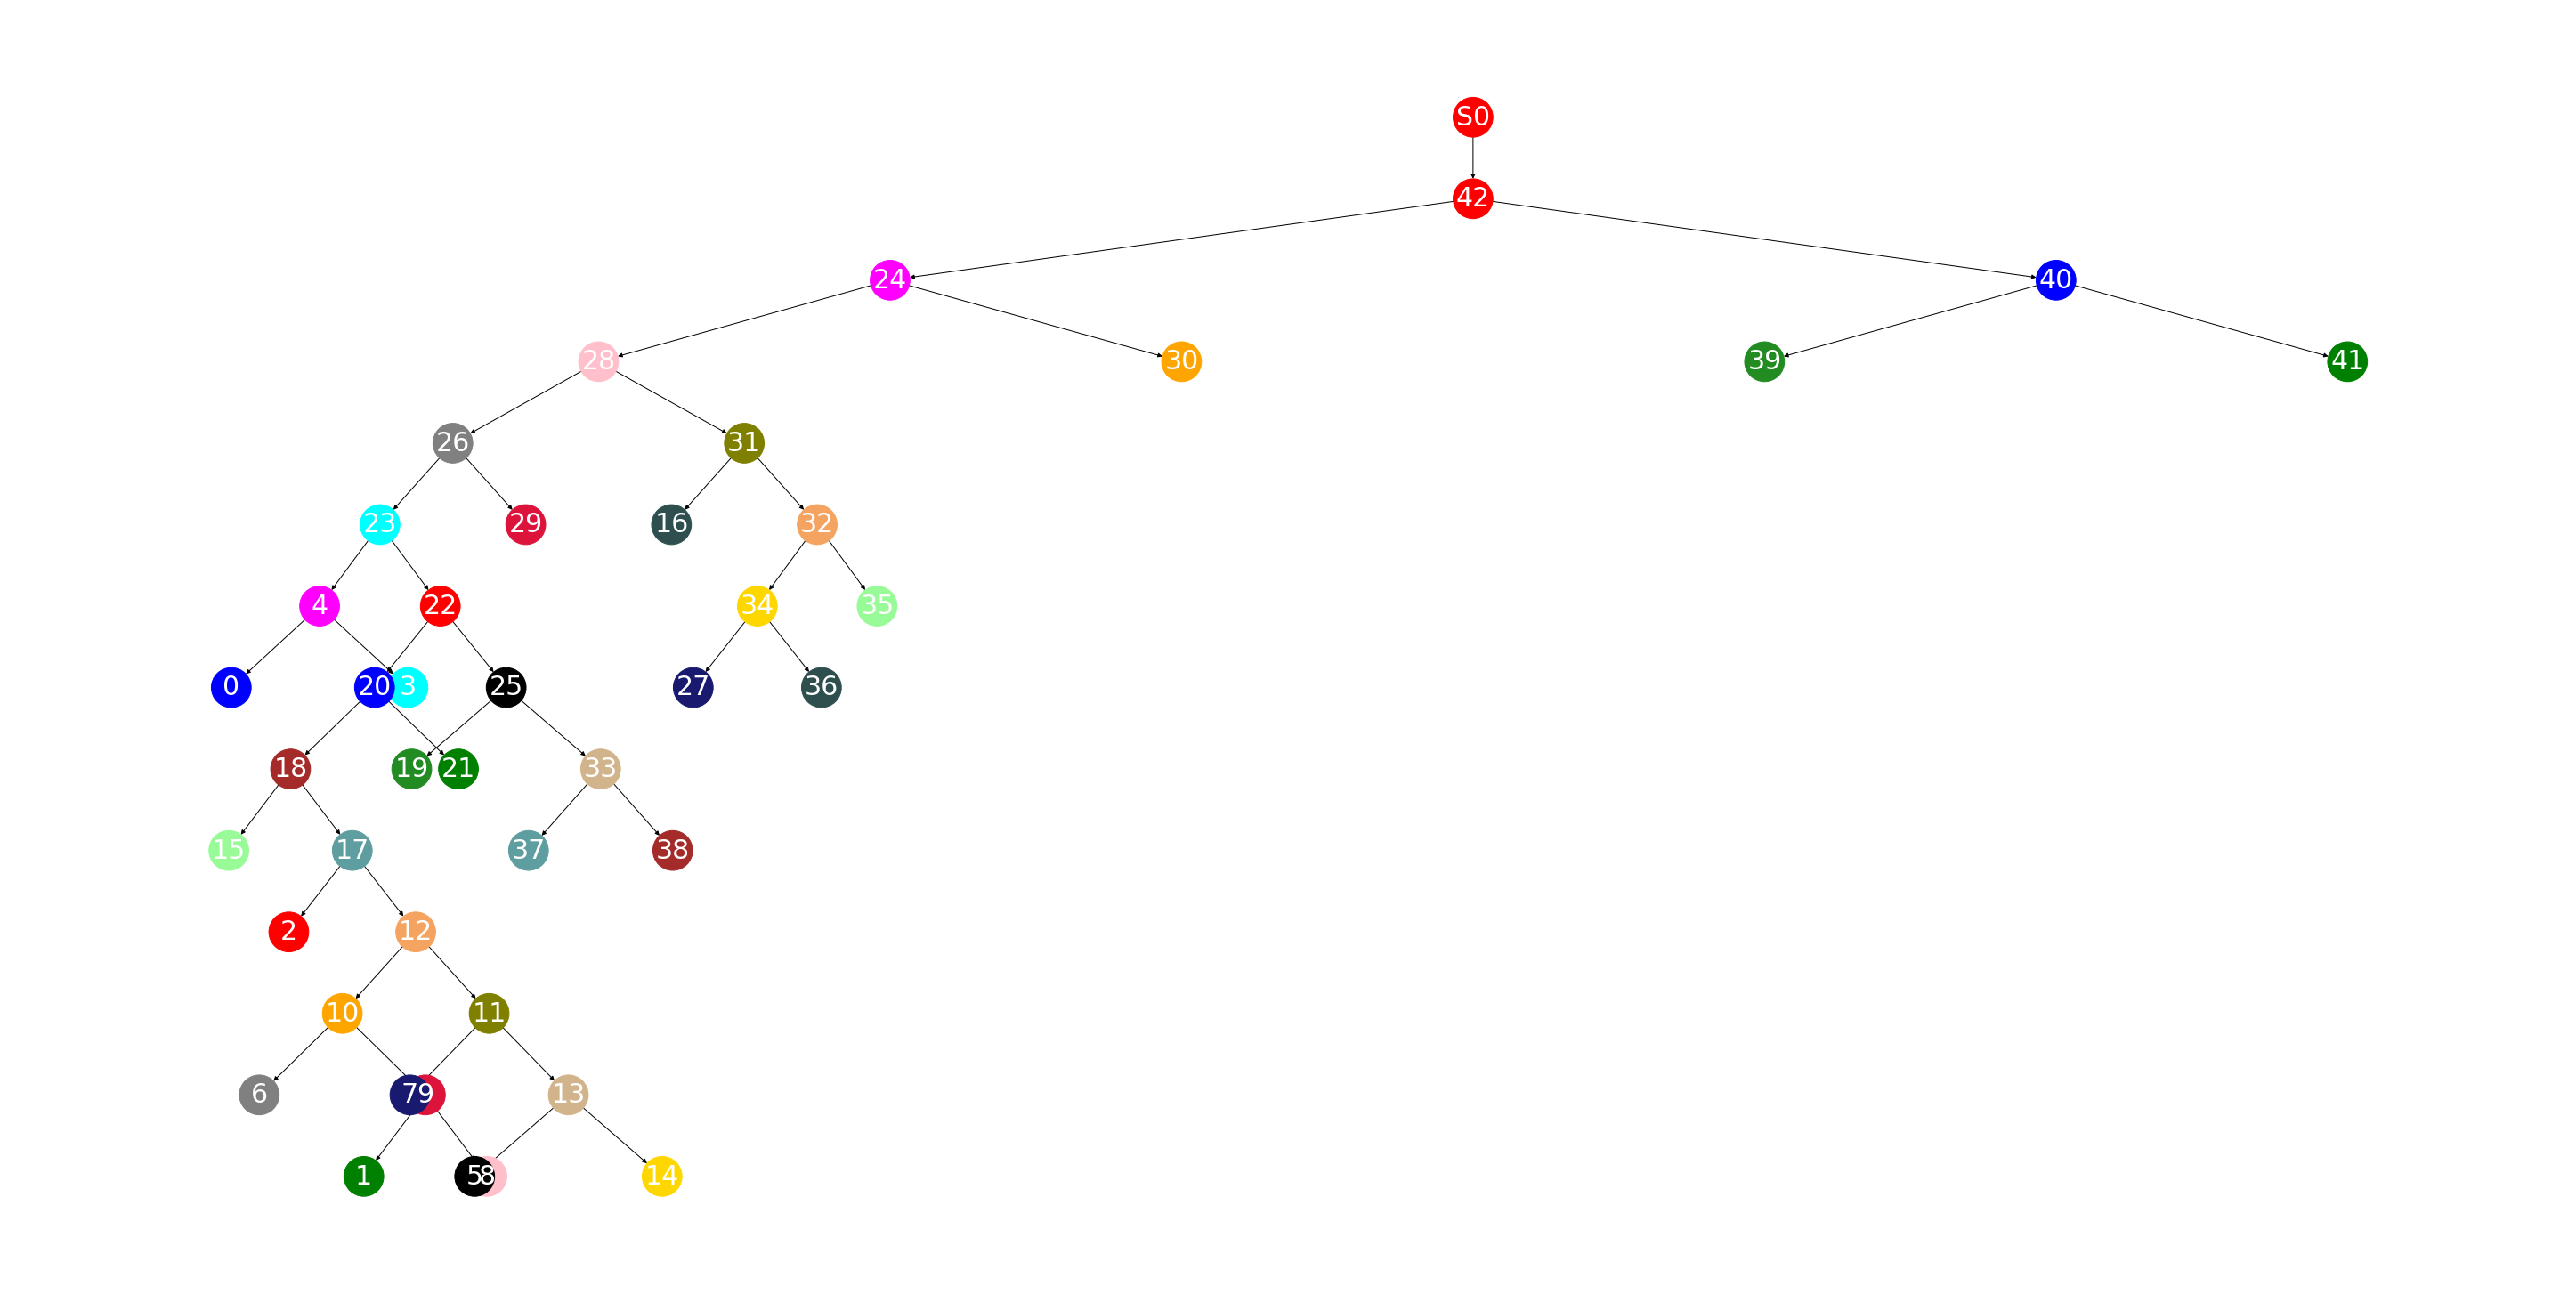

In [16]:
nviz.plot_limb_concept_network_2D(neuron_obj,
                                  limb_name="L1",
                                 node_colors=returned_color_dict)

In [36]:
returned_color_dict = nviz.visualize_neuron(neuron_obj,
                                            limb_branch_dict="all",
                                           mesh_resolution="limb",
                                            return_color_dict=True)


 Working on visualization type: mesh


nrows = 4
n-ncols*nrows = -1


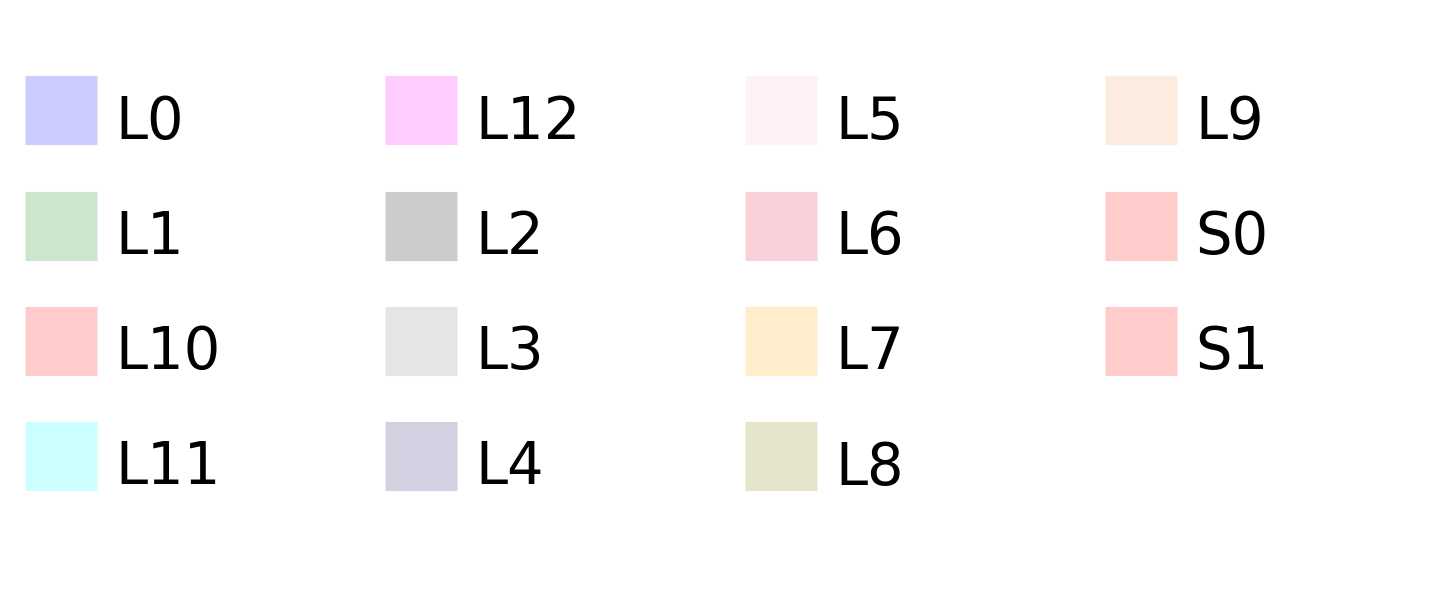

In [37]:
import matplotlib_utils as mu
mu.plot_color_dict(returned_color_dict)

In [7]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh


In [8]:
neuron_obj[0][0].width_new

{'median_mesh_center': 271.9277619984163,
 'mean_mesh_center': 278.77233788161084,
 'no_spine_mean_mesh_center': 264.73634782372875,
 'no_spine_median_mesh_center': 271.106880453142}

# Doing the Axon Classificaiton

In [ ]:
"""
Pseudocode: 
0) Label the branches that you think are axon like
1) Geta ll the branches a certain distance away from the soma
2) Remove the branches from the graph
3) Analyze each of the disconnected sub limbs (maybe that starts with an axon)
a. trace back to the last dendritic branch or soma
b. Find the width at the boundary between the dendritic shaft or the soma 
--> should be a certain distance
c. Measure the amount of downstream nodes
d. Measure total length
e. See where the placement is in relation to the soma (and across from the apical)



# Will need to do some clean up of who is axon and who is dendrite at the end

"""

In [ ]:
import neuron_searching as ns
uncompressed_neuron = neuron_obj

# ----- 0) Initial Axon Querying without filtering

In [ ]:
current_functions_list = [
    "width",
    "median_mesh_center",
    "n_spines",
    "n_faces_branch",
    "skeleton_distance_branch",
    "spines_per_skeletal_length",
    "no_spine_median_mesh_center",
]

width_requirement = "(median_mesh_center < 200)"# or no_spine_median_mesh_center < 150)"
limb_branch_dict = ns.query_neuron(uncompressed_neuron,
                                   #query="n_spines < 4 and no_spine_average_mesh_center < 400",
                                   query=(f"(n_spines < 4 and {width_requirement} and skeleton_distance_branch <= 15000)"
                                   f" or (skeleton_distance_branch > 15000 and {width_requirement} and spines_per_skeletal_length < 0.00023)"),
                                   #return_dataframe=True,
               functions_list=current_functions_list)

colors_dict_returned = nviz.visualize_neuron(uncompressed_neuron,
                      limb_branch_dict=limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# ---- Adding the Axon Filtereing 

In [ ]:
#How to give a limb_branch_dict as an argument
current_functions_list = ["axon_segment"]
limb_branch_dict_upstream_filter = ns.query_neuron(uncompressed_neuron,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                        width_match_threshold=50,
                                                       print_flag=False),
                                   functions_list=current_functions_list)

colors_dict_returned = nviz.visualize_neuron(uncompressed_neuron,
                      limb_branch_dict=limb_branch_dict_upstream_filter,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# ---- 1) Getting All of the Branches That are a certain Distance Away

In [ ]:
soma_idx = 0

In [ ]:
distance_from_soma_threshold = 20000
close_limb_branch_dict = ns.query_neuron(uncompressed_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{distance_from_soma_threshold}",
                                        function_kwargs=dict(somas=[soma_idx])


                                        )

colors_dict_returned = nviz.visualize_neuron(uncompressed_neuron,
                      limb_branch_dict=close_limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# --- 2) Remove the Branches from the Graph

In [ ]:
import matplotlib_utils as mu

In [ ]:
neuron_copy = neuron.Neuron(uncompressed_neuron)
neuron_copy

In [ ]:
close_limb_branch_dict

In [ ]:
import networkx_utils as xu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(neuron_copy.concept_network,nru.soma_label(soma_idx),int_label=False)
total_sub_limbs = dict()

sub_limb_color_dict = dict()
new_networks = dict()
for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = neuron_copy[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = "black"
    
    print(f"nodes_to_eliminate = {nodes_to_eliminate}")
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    new_networks[limb_idx] = curr_limb_copy.concept_network_directional
    
    curr_limb_conn_comp = list(nx.connected_components(nx.Graph(new_networks[limb_idx])))
    
    if len(curr_limb_conn_comp) == 0:
        curr_limb_conn_comp = [nodes_to_eliminate]
    
    total_sub_limbs[limb_idx] = curr_limb_conn_comp
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):
        #get a random color
        print(f"curr_random_color = {curr_random_color}")
        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


In [ ]:
nviz.visualize_neuron(uncompressed_neuron,
                      limb_branch_dict="all",
                      mesh_color=sub_limb_color_dict,
                      mesh_fill_color=[0,1,0,0.2],
                     )

# Analyze Each disconnected root node

In [ ]:
"""
Things that need to find out about each connected node:
1) how much axon is on that branch (eASY)
- but if no axon then we still want to count it
2) What the width transitions look like going all the way back to the soma
3) n_spines
4) amount of axon on sublimb





Problem 1: If no branches left after do cancelling
If not any submeshes then just make that mesh the submesh

Problem 2: If split up the axon into multiple pieces by doing the cancelling
Idea: if all sublimbs on limb look like axon then 
recompile the sublimb into the whole limb and rerun the analysis on this limb
and see if it fits the axon description -

Problem 3: What if have small axon initial segment and not much after there?
Idea: May just hae to cancel out and end up with one that doesn't violate any of the rules

Problem 4: Could potentially cancel out a whole submesh by the subtraction nodes

"""

In [ ]:
for limb_idx in limbs_to_check:
    print(f"\n Limb {limb_idx}:")
    for sub_limb_nodes in total_sub_limbs[limb_idx]:
        print(sub_limb_nodes)

# ---  Getting the Width Transition going all the way back to the soma ---- 

In [ ]:
"""
Pseudocode:
1) check if using whole limb or just part of it

- If using just part of it:
a) Find the node that is bordering a subtraction node
b) Trace that node all the way back to the soma on the concept network
c) Find the path back to the soma
d) Find all width transitions
-- We want to ideally find out when it becomes the axon initial segment


"""